In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

sys.path.append('../modules/')

import funAdapt as fa

In [3]:
sys.path.append('../../lib/')
import funPlots as fplot

import cmasher

fplot.master_format(ncols = 1, nrows = 1)

In [4]:
color_act = "#c1121f"
color_pass = "#118ab2"

In [5]:
def divide_array(arr):
    arr_trap = arr[:2]
    arr_strech = arr[2:12]
    arr_opt_micro = arr[12:19]
    arr_opt_sens = arr[19:]

    return arr_trap, arr_strech, arr_opt_micro, arr_opt_sens

def divide_active_passive(S, I, th):
    idx_passive = np.where(S < th)
    idx_active = np.where(S >= th)

    S_passive = S[idx_passive]
    I_passive = I[idx_passive]

    S_active = S[idx_active]
    I_active = I[idx_active]

    return S_passive, I_passive, S_active, I_active

In [6]:
Stot_XY = np.loadtxt('../data/figure4/sXYTRUE.txt')
Iyeta_XY = np.loadtxt('../data/figure4/IXY.txt')/np.log(2)

Stot_Yeta = np.loadtxt('../data/figure4/sYeta.txt')
Iyeta_Yeta = np.loadtxt('../data/figure4/IYeta.txt')/np.log(2)

Lambda = np.loadtxt('../data/figure4/lambda.txt')
Sxy_red_XY = np.loadtxt('../data/figure4/sXY.txt')

sAN = np.loadtxt('../data/figure4/sANxy.txt')
IAN = np.loadtxt('../data/figure4/iANxy.txt')/np.log(2)

In [7]:
Stot_XY_trap, Stot_XY_strech, Stot_XY_opt_micro, Stot_XY_opt_sens = divide_array(Stot_XY)
Iyeta_XY_trap, Iyeta_XY_strech, Iyeta_XY_opt_micro, Iyeta_XY_opt_sens = divide_array(Iyeta_XY)

In [8]:
array_pairs = [(Stot_XY_trap, Iyeta_XY_trap), (Stot_XY_strech, Iyeta_XY_strech), (Stot_XY_opt_micro, Iyeta_XY_opt_micro), (Stot_XY_opt_sens, Iyeta_XY_opt_sens)]

In [12]:
1.35/np.log(2)

1.9476383052001007

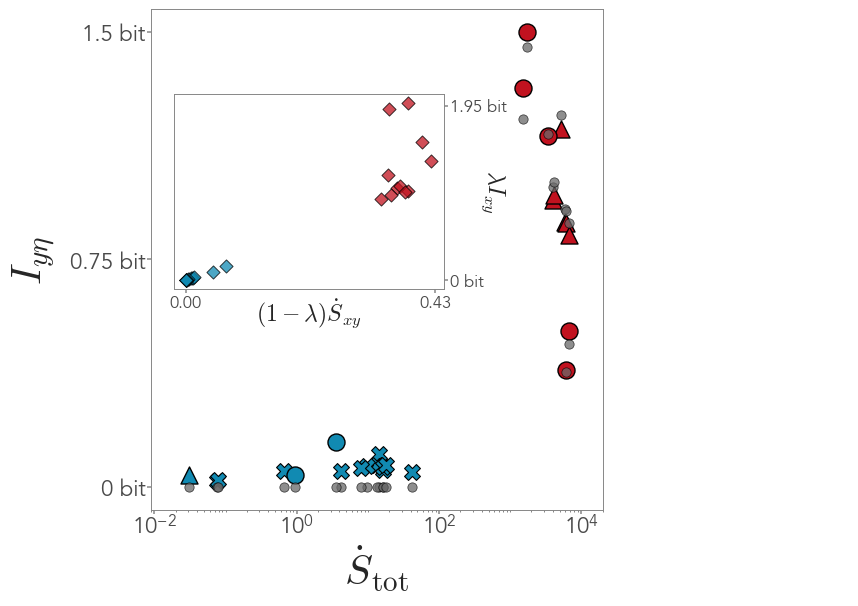

In [14]:
fig, axs = plt.subplot_mosaic([['main', 'main', "s1"],
                               ['main', 'main', "s2"]], figsize=(9, 6.5))
axs["s1"].axis('off')
axs["s2"].axis('off')
ax = axs["main"]
ax.set_xscale('log')

for i, arr in enumerate(array_pairs):
    S, I = arr
    S_passive, I_passive, S_active, I_active = divide_active_passive(S, I, 100)

    if i == 0 or i == 1:
        ax.scatter(S_passive, I_passive, color = color_pass, s = 130, ec = 'k', lw = 0.8, marker = 'X')
    if i == 2:
        ax.scatter(S_passive, I_passive, color = color_pass, s = 150, ec = 'k', lw = 1, marker = '^')
        ax.scatter(S_active, I_active, color = color_act, s = 150, ec = 'k', lw = 1, marker = '^')
    if i == 3:
        ax.scatter(S_passive, I_passive, color = color_pass, s = 150, ec = 'k', lw = 1, marker = 'o')
        ax.scatter(S_active, I_active, color = color_act, s = 150, ec = 'k', lw = 1, marker = 'o')

ax.scatter(Stot_XY, Iyeta_Yeta, c ='dimgray', alpha = 0.75, ec = 'k', lw = 0.5, s = 45)

ax.set_xlabel(r"$\dot{S}_{\rm tot}$", fontsize = 30)
ax.set_ylabel(r"$I_{y \eta}$", fontsize = 30, labelpad = 10)

ax.set_yticks([0, 0.75, 1.5])
ax.set_yticklabels(["0 bit", "0.75 bit", "1.5 bit"])
ax.set_xlim(9e-3, 2e4)
fplot.restore_log_ticks(ax.xaxis, 10)
ax.set_xticks([1e-2, 1e0, 1e2, 1e4])



#################################

ax2 = fig.add_axes([0.15, 0.45, 0.3, 0.3])

fplot.right_ylabel(ax2)
ax2.xaxis.set_tick_params(labelsize = 12)
ax2.yaxis.set_tick_params(labelsize = 12)

xxx = (1 - Lambda)*sAN
yyy = Lambda*IAN

ax2.scatter(xxx[sAN < 10], yyy[sAN < 10], c = color_pass, alpha = 0.75, ec = 'k', lw = 0.7, s = 45, marker = 'D')
ax2.scatter(xxx[sAN >= 10], yyy[sAN >= 10], c = color_act, alpha = 0.75, ec = 'k', lw = 0.7, s = 45, marker = 'D')

ax2.set_ylabel(r"$\lambda I_{xy}$", fontsize = 17, rotation = 270, labelpad = 0)
ax2.set_xlabel(r"$(1-\lambda) \dot{S}_{xy}$", fontsize = 17, labelpad = -10)

ax2.set_yticks([0, 1.95])
ax2.set_yticklabels(["0 bit", "1.95 bit"])
ax2.set_xticks([0, 0.43])

plt.savefig('../figures/figure4_draft.svg', bbox_inches='tight')
plt.show()

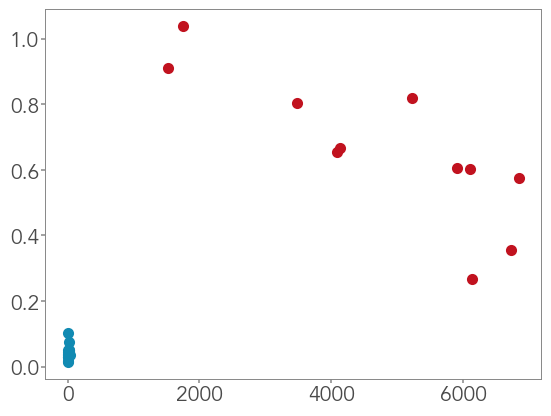

In [23]:
S_passive, I_passive, S_active, I_active = divide_active_passive(Stot_XY, Iyeta_XY, 100)

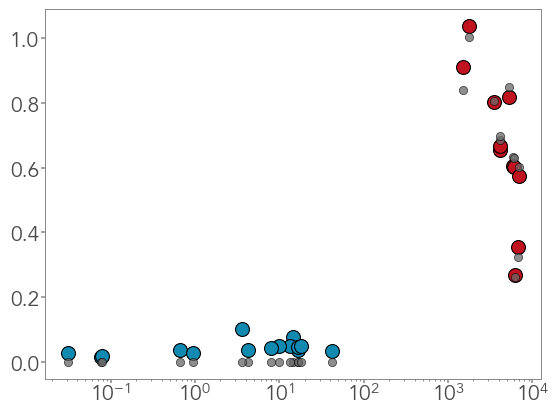

In [59]:
plt.scatter(S_passive, I_passive, color = color_pass, s = 100, ec = 'k', lw = 0.8)
plt.scatter(S_active, I_active, color = color_act, s = 100, ec = 'k', lw = 0.8)

plt.scatter(Stot_XY, Iyeta_Yeta, c ='dimgray', alpha = 0.75, ec = 'k', lw = 0.5, s = 35)

plt.xscale('log')